- 로지스틱회귀에 사용되는 분류 함수는 시그모이드 함수(이진분류에 사용되는 함수, True/False) 냐 소프트맥스 함수(다중분류에 사용되는 함수)냐 가 사용됨(둘 중 하나)
- 분류형 모델의 손실값을 나타내는 것을 크로스 엔트로피라고 부른다. 
- 손실값을 구하는 방법이 선형회귀와는 다르다.

- 회귀작업을 이용해서 분류하는 것은 로지스틱 회귀작업이다. 

## 로지스틱회귀 파라메터
- solver - 최적화에 사용할 알고리즘, default = 'lbfgs'
- max_iter -solve의 수렴에 걸릴 최대 반복 회수. default = 100
- multi_class -ovr: 이진 문제, multinomial: 다항 문제 적합, default = 'auto'

In [1]:
import numpy as np


In [2]:
def sigmoid(z): 
 return 1 / (1+np.exp(-z))

In [3]:
# 손실함수 크로스엔트로피 구현
def loss_func(x, t):
 delta = 1e-7 # log 무한대 발산 방지
 z = np.dot(x, W) + b #z 값 구하는 과정 wx + b
 y = sigmoid(z) #y는 0과 1사이의 확률값을 가진다.
 # cross-entropy
 return -np.sum(t*np.log(y + delta) + (1-t)*np.log((1 - y)+delta )) #t는 정답이 된다. 


In [4]:
# 예측함수(시그모이드 함수의 출력값을 이용해서 분류하는 작업)
def predict(test_data): 
     z = np.dot(test_data, W) + b
     y = sigmoid(z) #y는 확률값 , result는 분류값
     if y >= 0.5:
        result = 1 # Pass
     else:
        result = 0 # Fail
     return y, result

In [5]:
# 수치미분 함수 
def numerical_derivative(f, x):
 delta_x = 1e-4 # 0.0001
 grad = np.zeros_like(x) #수치미분된 값 저장할 ndarray로 x와 같은 크기의 0으로 된 배열 생성
 
 it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
 
 while not it.finished:
     idx = it.multi_index 
     tmp_val = x[idx]
     x[idx] = float(tmp_val) + delta_x
     fx1 = f(x) # f(x+delta_x)

     x[idx] = float(tmp_val) - delta_x 
     fx2 = f(x) # f(x-delta_x)
     grad[idx] = (fx1 - fx2) / (2*delta_x)

     x[idx] = tmp_val 
     it.iternext() # 다음 인덱스로 이동 
 
 return grad

In [6]:
import numpy as np 
from datetime import datetime 
x_data = np.array([2, 4, 6, 8, 10, 12, 14, 16, 18, 20]).reshape(10,1) #학습데이터 (1차원을 2차원으로 변환시킴)
t_data = np.array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1]).reshape(10,1) 
W = np.random.rand(1,1) #시드값이 없기 때문에 초기값은 달라짐
b = np.random.rand(1)
print("x_data.shape = ", x_data.shape, ", t_data.shape = ", t_data.shape)
print("W = ", W, ", W.shape = ", W.shape, ", b = ", b, ", b.shape = ", b.shape)



x_data.shape =  (10, 1) , t_data.shape =  (10, 1)
W =  [[0.12871098]] , W.shape =  (1, 1) , b =  [0.60121177] , b.shape =  (1,)


In [7]:
# 수치미분을 이용한 로지스틱 회귀(Logistic Regression) 시스템 학습과정
learning_rate = 1e-2
f = lambda x : loss_func(x_data,t_data) 
print("Initial loss value = ", loss_func(x_data, t_data) )
start_time = datetime.now()
for step in range(50001): # 이 횟수는 정해진 것이 없다.
     W -= learning_rate * numerical_derivative(f, W) 
     b -= learning_rate * numerical_derivative(f, b)
     if (step % 5000 == 0): 
         print("step = ", step, "loss value = ", loss_func(x_data, t_data))

Initial loss value =  10.553508862290998
step =  0 loss value =  13.17934417493237
step =  5000 loss value =  0.8457809670564934
step =  10000 loss value =  0.6212110020629
step =  15000 loss value =  0.50962734610441
step =  20000 loss value =  0.4378763843366297
step =  25000 loss value =  0.3862195571192288
step =  30000 loss value =  0.34658307832892005
step =  35000 loss value =  0.3148970702232072
step =  40000 loss value =  0.2888290646908877
step =  45000 loss value =  0.26692070149156366
step =  50000 loss value =  0.24820099308921778


In [8]:
# 이전까지는 선형회귀 모델과 같은데 이 부분이 다름 (이 부분은 예측하는 부분임)
test_data = np.array([3.0]) # 3 시간에 대한 미래 값 예측
(real_val_1, logical_val_1) = predict(test_data) #real_val_1 => 확률값이 저장 ,  logical_val_1 => 분류값이 저장
print("시그모이드 결과 =>", real_val_1, ", 로지스틱회귀 결과 =>", logical_val_1)
test_data = np.array([17.0]) # 17 시간에 대한 미래 값 예측
(real_val_2, logical_val_2) = predict(test_data)
print("시그모이드 결과 =>", real_val_2, ", 로지스틱회귀 결과 =>", logical_val_2)

시그모이드 결과 => [1.41581058e-09] , 로지스틱회귀 결과 => 0
시그모이드 결과 => [0.99974544] , 로지스틱회귀 결과 => 1


## scikit-learn으로 실습 1

In [9]:
# 유방암 데이터 불러오기
from sklearn.datasets import load_breast_cancer #사이킷런에서 load 계열은 모든 데이터가 딕셔너리 구조로 되어있다.
import pandas as pd
dataset = load_breast_cancer()
train = pd.DataFrame(dataset.data, columns=dataset.feature_names)
target = pd.DataFrame(dataset.target, columns=["cancer"])

# 학습데이터와 타켓 데이터를 합쳐서 하나의 데이터 프레임 생성
data = pd.concat([train, target], axis=1)

data.info() # 데이터의 기본정보 확인


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [10]:
# 학습용 데이터/검증용 데이터 생성
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data[["mean radius"]],data[["cancer"]], # testsize가 생략됨 (디폴트 0.25)   # 전체 데이터 중 data[["mean radius"]] 만 이용한다. 
random_state=42)
print(X_train)
print('-------------------------------')
print(y_train)
print('-------------------------------')

     mean radius
287       12.890
512       13.400
402       12.960
446       17.750
210       20.580
..           ...
71         8.888
106       11.640
270       14.290
435       13.980
102       12.180

[426 rows x 1 columns]
-------------------------------
     cancer
287       1
512       0
402       1
446       0
210       0
..      ...
71        1
106       1
270       1
435       0
102       1

[426 rows x 1 columns]
-------------------------------


In [11]:
# 모델 생성 및 학습
from sklearn.linear_model import LogisticRegression
# solver : 최적화에 사용한 알고리즘 설정.
model = LogisticRegression(solver="liblinear")
model.fit(X_train, y_train) # X_train  = 학습데이터, y_train은 정답

C:\project\ai_source\AI_01\venv\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(solver='liblinear')

In [12]:
# 모델 예측 및 평가
from sklearn.metrics import accuracy_score
pred = model.predict(X_test)
print("mean radius 만으로 예측한 결과: ", pred)
accuracy_score(y_test, pred)


mean radius 만으로 예측한 결과:  [1 0 0 1 1 0 0 0 1 1 1 0 1 0 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0
 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 0 0 1 1 1 0 0 1 1 1 0 1 0
 1 1 1 1 1 1 0 1 1 0 0 0 1 0 1 1 1 1 1 1 1 1 0 1 1 0 0 1 0 0 1 1 1 0 1 1 0
 1 1 0 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 0 0 0 1 1 0 0 1 1 1 1 1 0 1]


0.916083916083916

In [13]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


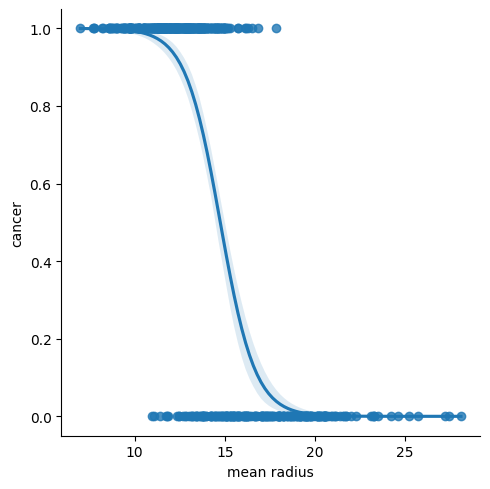

In [14]:
# 모델 그리기:mean radius 피처가 타겟을 어떻게 분류했는지 확인
# pip install statsmodels : statsmodels 설치 확인
from seaborn import lmplot
import matplotlib.pyplot as plt
lmplot(x="mean radius", y="cancer", data=data, logistic=True)
plt.show()

In [15]:
# 전체 데이터로 모델 학습 및 평가
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:, :-1], data.loc[:, "cancer"], 
random_state=42)
model.fit(X_train, y_train)
score = model.score(X_test, y_test)
print(f"전체 데이터로 예측한 결과: {score}")

전체 데이터로 예측한 결과: 0.958041958041958


In [16]:
# minmax_scarilng
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_trian_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver = 'liblinear')
model.fit (X_trian_scaled, y_train)
score = model.score(X_test_scaled, y_test)
print(f'전체 데이터로 예측한 결과: {score}')


전체 데이터로 예측한 결과: 0.972027972027972


## scikit-learn 2 실습 (타이타닉 데이터)

In [17]:
#ver 1
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import pandas as pd
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split 

df = sns.load_dataset("titanic") 
df.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [18]:
feature_names = ["pclass", "age", "sex"]
dfX = df[feature_names].copy() # 총 3개의 컬럼을 저장함. (학습데이터로 사용함)
dfy = df["survived"].copy() # dfy를 정답으로 사용하겠다.
dfX["sex"] = LabelEncoder().fit_transform(dfX["sex"]) # 레이블 인코딩으로 변환
dfX["age"].fillna(dfX["age"].mean(), inplace=True) # fillna => nan위치에 채워라( mean(), 즉 평균값으로 채워라)
dfX.tail()


,pclass,age,sex
886,2,27.000000,1
887,1,19.000000,0
888,3,29.699118,0
889,1,26.000000,1
890,3,32.000000,1


In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(dfX, dfy, test_size=0.3, random_state=1)
X_train.head()

,pclass,age,sex
114,3,17.000000,0
874,2,28.000000,0
76,3,29.699118,1
876,3,20.000000,1
674,2,29.699118,1


In [20]:
log_clf = LogisticRegression()
log_clf.fit(X_train,Y_train)
log_clf.score(X_test, Y_test)

0.7761194029850746

### pd.get_dummies() 사용( 판다스가 정의하고 있는 원핫 인코딩 처리)


In [21]:
import pandas as pd
fruit = pd.DataFrame({'name':['apple', 'banana', 'cherry', 'durian', np.nan],
     'color':['red', 'yellow', 'red', 'green', np.nan]})
pd.get_dummies(fruit) # get_dummies 를 사용하면 '컬럼명_ 값' 이렇게 만들어진다.

,name_apple,name_banana,name_cherry,name_durian,color_green,color_red,color_yellow
0,1,0,0,0,0,1,0
1,0,1,0,0,0,0,1
2,0,0,1,0,0,1,0
3,0,0,0,1,1,0,0
4,0,0,0,0,0,0,0


In [22]:
fruit

,name,color
0,apple,red
1,banana,yellow
2,cherry,red
3,durian,green
4,NaN,NaN


In [23]:
# 내가 원하는 컬럼만 변환도 가능하다.
pd.get_dummies(fruit['name']) #원하는 컬럼의 값만 보여준다.



,apple,banana,cherry,durian
0,1,0,0,0
1,0,1,0,0
2,0,0,1,0
3,0,0,0,1
4,0,0,0,0


In [24]:
pd.get_dummies(fruit['color'])

,green,red,yellow
0,0,1,0
1,0,0,1
2,0,1,0
3,1,0,0
4,0,0,0


* OneHotEncoder: scikit-learn
* get_dummies() : pandas
* to_categorical(): keras( 딥러닝파트의 onehotencodin)

## 인터넷 신규가입 여부 예측 실습 예제

### 내가 한 것

In [25]:
import pandas as pd
df = pd.read_csv('newbie.csv')
df

,who,Newbie,Age,Gender,Household Income,Sexual Preference,Country,Education Attainment,Major Occupation,Marital Status,Years on Internet
0,id74364,0,54.0,Male,$50-74,Gay male,Ontario,Some College,Computer,Other,4-6 yr
1,id84505,0,39.0,Female,Over $100,Heterosexual,Sweden,Professional,Other,Other,1-3 yr
2,id84509,1,49.0,Female,$40-49,Heterosexual,Washington,Some College,Management,Other,Under 6 mo
3,id87028,1,22.0,Female,$40-49,Heterosexual,Florida,Some College,Computer,Married,6-12 mo
4,id76087,0,20.0,Male,$30-39,Bisexual,New Jersey,Some College,Education,Single,1-3 yr
...,...,...,...,...,...,...,...,...,...,...,...
19578,id83400,0,22.0,Male,Over $100,Heterosexual,Texas,Some College,Education,Single,4-6 yr
19579,id72216,0,19.0,Male,NaN,Heterosexual,New Jersey,Some College,Education,Single,4-6 yr
19580,id8654,0,49.0,Female,$50-74,Heterosexual,Missouri,Doctoral,Education,Married,1-3 yr
19581,id84503,1,42.0,Female,$50-74,Heterosexual,Kentucky,Some College,Other,Married,Under 6 mo


In [26]:
#독립변수 'who','Country','Years on Internet' 제거
newdata= df.drop(['who','Country','Years on Internet'], axis=1)
newdata

,Newbie,Age,Gender,Household Income,Sexual Preference,Education Attainment,Major Occupation,Marital Status
0,0,54.0,Male,$50-74,Gay male,Some College,Computer,Other
1,0,39.0,Female,Over $100,Heterosexual,Professional,Other,Other
2,1,49.0,Female,$40-49,Heterosexual,Some College,Management,Other
3,1,22.0,Female,$40-49,Heterosexual,Some College,Computer,Married
4,0,20.0,Male,$30-39,Bisexual,Some College,Education,Single
...,...,...,...,...,...,...,...,...
19578,0,22.0,Male,Over $100,Heterosexual,Some College,Education,Single
19579,0,19.0,Male,NaN,Heterosexual,Some College,Education,Single
19580,0,49.0,Female,$50-74,Heterosexual,Doctoral,Education,Married
19581,1,42.0,Female,$50-74,Heterosexual,Some College,Other,Married


In [27]:
newdata.Age.mean()

35.22226895174009

In [28]:
newdata.Age.isnull()

0        False
1        False
2        False
3        False
4        False
         ...  
19578    False
19579    False
19580    False
19581    False
19582    False
Name: Age, Length: 19583, dtype: bool

In [29]:
# Age는 평균으로 결측값 제거
from sklearn.impute import SimpleImputer
import numpy as np
age_mean = SimpleImputer(missing_values = np.nan, strategy = 'mean')
df_age = age_mean.fit_transform(df[['Age']])
df_age

array([[54.],
       [39.],
       [49.],
       ...,
       [49.],
       [42.],
       [24.]])

교수님이 하신 것

In [30]:
import pandas as pd
import numpy as np
from sklearn import model_selection
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model, datasets
df = pd.read_csv('newbie.csv')
df

,who,Newbie,Age,Gender,Household Income,Sexual Preference,Country,Education Attainment,Major Occupation,Marital Status,Years on Internet
0,id74364,0,54.0,Male,$50-74,Gay male,Ontario,Some College,Computer,Other,4-6 yr
1,id84505,0,39.0,Female,Over $100,Heterosexual,Sweden,Professional,Other,Other,1-3 yr
2,id84509,1,49.0,Female,$40-49,Heterosexual,Washington,Some College,Management,Other,Under 6 mo
3,id87028,1,22.0,Female,$40-49,Heterosexual,Florida,Some College,Computer,Married,6-12 mo
4,id76087,0,20.0,Male,$30-39,Bisexual,New Jersey,Some College,Education,Single,1-3 yr
...,...,...,...,...,...,...,...,...,...,...,...
19578,id83400,0,22.0,Male,Over $100,Heterosexual,Texas,Some College,Education,Single,4-6 yr
19579,id72216,0,19.0,Male,NaN,Heterosexual,New Jersey,Some College,Education,Single,4-6 yr
19580,id8654,0,49.0,Female,$50-74,Heterosexual,Missouri,Doctoral,Education,Married,1-3 yr
19581,id84503,1,42.0,Female,$50-74,Heterosexual,Kentucky,Some College,Other,Married,Under 6 mo


In [31]:
# 독립변수 제거
df= df.drop(['who','Country','Years on Internet'], axis=1)
df.head()

,Newbie,Age,Gender,Household Income,Sexual Preference,Education Attainment,Major Occupation,Marital Status
0,0,54.0,Male,$50-74,Gay male,Some College,Computer,Other
1,0,39.0,Female,Over $100,Heterosexual,Professional,Other,Other
2,1,49.0,Female,$40-49,Heterosexual,Some College,Management,Other
3,1,22.0,Female,$40-49,Heterosexual,Some College,Computer,Married
4,0,20.0,Male,$30-39,Bisexual,Some College,Education,Single


In [32]:
#결측값 처리
df['Age'] = df['Age'].fillna(df['Age'].mean())

In [33]:
df['Household Income'].mode()[0] # 값만 추출

'$50-74'

In [34]:
#결측값 처리

df['Household Income'] = df['Household Income'].fillna(df['Household Income'].mode()[0])
df['Sexual Preference'] = df['Sexual Preference'].fillna(df['Sexual Preference'].mode()[0])
df['Marital Status'] = df['Marital Status'].fillna(df['Marital Status'].mode()[0])

In [35]:
df.isnull().sum() # 결측 데이터 확인

Newbie                  0
Age                     0
Gender                  0
Household Income        0
Sexual Preference       0
Education Attainment    0
Major Occupation        0
Marital Status          0
dtype: int64

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19583 entries, 0 to 19582
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Newbie                19583 non-null  int64  
 1   Age                   19583 non-null  float64
 2   Gender                19583 non-null  object 
 3   Household Income      19583 non-null  object 
 4   Sexual Preference     19583 non-null  object 
 5   Education Attainment  19583 non-null  object 
 6   Major Occupation      19583 non-null  object 
 7   Marital Status        19583 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 1.2+ MB


In [37]:
df['Gender'] = df['Gender'].astype('category')
df['Household Income'] = df['Household Income'].astype('category') # astype('category') => object type 을 category로 변경하는 작업 , astype() => 타입을 바꿔주는 작업
df['Sexual Preference'] = df['Sexual Preference'].astype('category')
df['Education Attainment'] = df['Education Attainment'].astype('category')
df['Major Occupation'] = df['Major Occupation'].astype('category')
df['Marital Status'] = df['Marital Status'].astype('category')

In [38]:
df

,Newbie,Age,Gender,Household Income,Sexual Preference,Education Attainment,Major Occupation,Marital Status
0,0,54.0,Male,$50-74,Gay male,Some College,Computer,Other
1,0,39.0,Female,Over $100,Heterosexual,Professional,Other,Other
2,1,49.0,Female,$40-49,Heterosexual,Some College,Management,Other
3,1,22.0,Female,$40-49,Heterosexual,Some College,Computer,Married
4,0,20.0,Male,$30-39,Bisexual,Some College,Education,Single
...,...,...,...,...,...,...,...,...
19578,0,22.0,Male,Over $100,Heterosexual,Some College,Education,Single
19579,0,19.0,Male,$50-74,Heterosexual,Some College,Education,Single
19580,0,49.0,Female,$50-74,Heterosexual,Doctoral,Education,Married
19581,1,42.0,Female,$50-74,Heterosexual,Some College,Other,Married


In [39]:
df = pd.get_dummies(df) # 카테고리형으로 변환한 데이터들만 원핫인코딩 처리
df.head() 

,Newbie,Age,Gender_Female,Gender_Male,Household Income_$10-19,Household Income_$20-29,Household Income_$30-39,Household Income_$40-49,Household Income_$50-74,Household Income_$75-99,...,Major Occupation_Education,Major Occupation_Management,Major Occupation_Other,Major Occupation_Professional,Marital Status_Divorced,Marital Status_Married,Marital Status_Other,Marital Status_Separated,Marital Status_Single,Marital Status_Widowed
0,0,54.0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
1,0,39.0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
2,1,49.0,1,0,0,0,0,1,0,0,...,0,1,0,0,0,0,1,0,0,0
3,1,22.0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,20.0,0,1,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0


In [40]:
x_data = df.iloc[:, 1:] # 학습데이터와 정답데이터를 분리 
y_data = df['Newbie']

In [41]:
x_data

,Age,Gender_Female,Gender_Male,Household Income_$10-19,Household Income_$20-29,Household Income_$30-39,Household Income_$40-49,Household Income_$50-74,Household Income_$75-99,Household Income_Over $100,...,Major Occupation_Education,Major Occupation_Management,Major Occupation_Other,Major Occupation_Professional,Marital Status_Divorced,Marital Status_Married,Marital Status_Other,Marital Status_Separated,Marital Status_Single,Marital Status_Widowed
0,54.0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
1,39.0,1,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,1,0,0,0
2,49.0,1,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,1,0,0,0
3,22.0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,20.0,0,1,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19578,22.0,0,1,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
19579,19.0,0,1,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
19580,49.0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,1,0,0,0,0
19581,42.0,1,0,0,0,0,0,1,0,0,...,0,0,1,0,0,1,0,0,0,0


In [42]:
# 학습데이터와 테스트 데이터를 분리 시키는 작업
x_train , x_test, y_train, y_test = model_selection.train_test_split(x_data, y_data, test_size = 0.33, random_state = 42)

In [43]:
x_test.shape

(6463, 37)

In [44]:
model = linear_model.LogisticRegression(solver = 'liblinear')
model.fit(x_train, y_train)

LogisticRegression(solver='liblinear')

In [45]:
pred = model.predict(x_test)
score = accuracy_score(y_test,pred)
print('test score:', score)

test score: 0.7494971375522204
